In [2]:
#Standard:

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

#Statistics: 

from scipy import stats

#Plotting modules and libraries:

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [256]:
#Steps:
# Calculate Moving Average - MA(4), Centered Moving Average -  CMA(2)
# Calculate Seasonal, Irregular components - St,It = Yt/CMA(2)
# Calculate St
#Deseasonalize by Yt/St
# Find Trend using Linear Regression
# Forecast = St * T

In [3]:
a = [np.array('Year 1')]*4
b = [np.array('Year 2')]*4
c = [np.array('Year 3')]*4
d = [np.array('Year 4')]*4

In [4]:
yr_total = np.concatenate([a,b,c,d])

In [5]:
srs_year = Series(yr_total)
srs_year
df_year = DataFrame(data = srs_year)
df_year

,0
0,Year 1
1,Year 1
2,Year 1
3,Year 1
4,Year 2
5,Year 2
6,Year 2
7,Year 2
8,Year 3
9,Year 3


In [8]:
a2 = np.arange(1,5)
a2

array([1, 2, 3, 4])

In [9]:
srs_qtr = Series(data = np.concatenate([a2,a2,a2,a2]))
srs_qtr
df_quarter = DataFrame(data = srs_qtr)
df_quarter

,0
0,1
1,2
2,3
3,4
4,1
5,2
6,3
7,4
8,1
9,2


In [10]:
sales = Series(data = [4.8,4.1,6.0,6.5,5.8,5.2,6.8,7.4,6.0,5.6,7.5,7.8,6.3,5.9,8.0,8.4])
sales_df = DataFrame(data = sales)
sales_df

,0
0,4.8
1,4.1
2,6.0
3,6.5
4,5.8
5,5.2
6,6.8
7,7.4
8,6.0
9,5.6


In [11]:
sales

0     4.8
1     4.1
2     6.0
3     6.5
4     5.8
5     5.2
6     6.8
7     7.4
8     6.0
9     5.6
10    7.5
11    7.8
12    6.3
13    5.9
14    8.0
15    8.4
dtype: float64

In [13]:
df_sales = DataFrame(data = pd.concat([df_year,df_quarter,sales_df],axis = 1))
df_sales.columns = ['Year','Quarter','Sales']
df_sales
                                                                                           

,Year,Quarter,Sales
0,Year 1,1,4.8
1,Year 1,2,4.1
2,Year 1,3,6.0
3,Year 1,4,6.5
4,Year 2,1,5.8
5,Year 2,2,5.2
6,Year 2,3,6.8
7,Year 2,4,7.4
8,Year 3,1,6.0
9,Year 3,2,5.6


<Figure size 432x288 with 0 Axes>

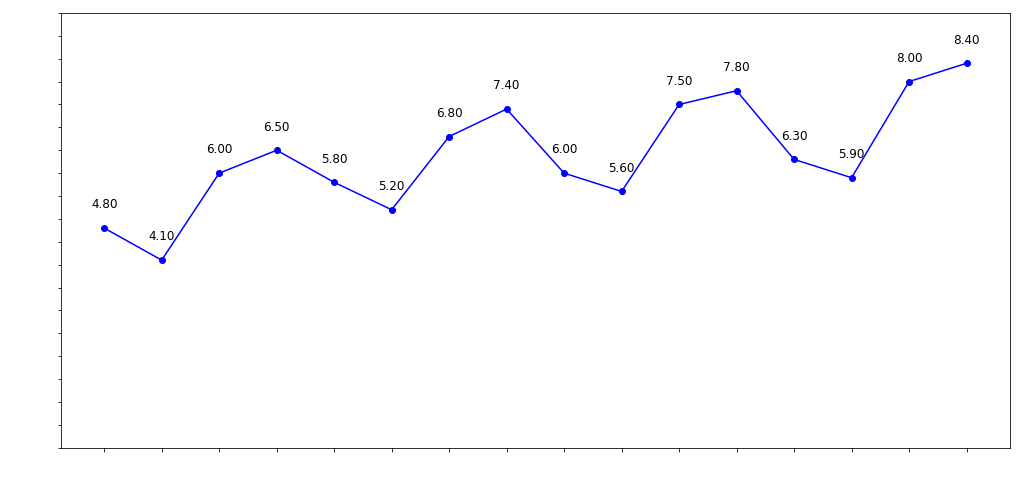

In [34]:
plt.clf()

fig = plt.figure(figsize = (17,8))

#data for points
xs = np.arange(1,17,1)
ys = sales

# 'bo-' means blue color, round points, solid lines
plt.plot(xs,ys,linestyle = '-', marker = 'o', color = 'blue')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20), # distance from text to points (x,y)
                 ha='center', fontsize = 12) # horizontal alignment can be left, right or center

plt.xticks(np.arange(1,17,1) , fontsize = 15, color = 'White' )
plt.yticks(np.arange(0,10,0.5), fontsize = 15, color = 'White')

plt.ylabel("Sales", fontsize = 20, color = 'White')
plt.xlabel("", fontsize = 20, color = 'White')



plt.show()

#plotting sales values

In [37]:
df_sales['MA for 4 quarters'] = df_sales['Sales'].rolling(4).mean()
df_sales['CMA'] = df_sales['MA for 4 quarters'].rolling(2).mean()

In [71]:
df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters
0,Year 1,1,4.8,NaN,NaN,NaN
1,Year 1,2,4.1,NaN,NaN,NaN
2,Year 1,3,6.0,NaN,NaN,5.350
3,Year 1,4,6.5,5.350,NaN,5.600
4,Year 2,1,5.8,5.600,5.4750,5.875
5,Year 2,2,5.2,5.875,5.7375,6.075
6,Year 2,3,6.8,6.075,5.9750,6.300
7,Year 2,4,7.4,6.300,6.1875,6.350
8,Year 3,1,6.0,6.350,6.3250,6.450
9,Year 3,2,5.6,6.450,6.4000,6.625


In [40]:
df_sales.drop('MA for 4 months', axis = 1, inplace = True)

In [65]:
df_sales['MA for 4 quarters']

0       NaN
1       NaN
2       NaN
3     5.350
4     5.600
5     5.875
6     6.075
7     6.300
8     6.350
9     6.450
10    6.625
11    6.725
12    6.800
13    6.875
14    7.000
15    7.150
Name: MA for 4 quarters, dtype: float64

In [70]:
df_sales['MA for 4 Quarters'] = np.zeros(16)

for n in np.arange(15):
    df_sales['MA for 4 Quarters'][n] = df_sales['MA for 4 quarters'][n+1]

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
df_sales['MA for 4 Quarters'][15] = np.nan
df_sales

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters
0,Year 1,1,4.8,NaN,NaN,NaN
1,Year 1,2,4.1,NaN,NaN,NaN
2,Year 1,3,6.0,NaN,NaN,5.350
3,Year 1,4,6.5,5.350,NaN,5.600
4,Year 2,1,5.8,5.600,5.4750,5.875
5,Year 2,2,5.2,5.875,5.7375,6.075
6,Year 2,3,6.8,6.075,5.9750,6.300
7,Year 2,4,7.4,6.300,6.1875,6.350
8,Year 3,1,6.0,6.350,6.3250,6.450
9,Year 3,2,5.6,6.450,6.4000,6.625


In [77]:
df_sales['CMA-2'] = np.zeros(16)

for n in np.arange(14):
    df_sales['MA for 4 Quarters'][n] = df_sales['CMA'][n+2]
    

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2
0,Year 1,1,4.8,NaN,NaN,NaN,0.0
1,Year 1,2,4.1,NaN,NaN,5.350,0.0
2,Year 1,3,6.0,NaN,NaN,5.600,0.0
3,Year 1,4,6.5,5.350,NaN,5.875,0.0
4,Year 2,1,5.8,5.600,5.4750,6.075,0.0
5,Year 2,2,5.2,5.875,5.7375,6.300,0.0
6,Year 2,3,6.8,6.075,5.9750,6.350,0.0
7,Year 2,4,7.4,6.300,6.1875,6.450,0.0
8,Year 3,1,6.0,6.350,6.3250,6.625,0.0
9,Year 3,2,5.6,6.450,6.4000,6.725,0.0


In [91]:
df_sales['MA for 4 Quarters'] = np.zeros(16)

for n in np.arange(15):
    df_sales['MA for 4 Quarters'][n] = df_sales['MA for 4 quarters'][n+1]

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [93]:
df_sales['MA for 4 Quarters'][15] = np.nan
df_sales

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters
0,Year 1,1,4.8,NaN,NaN,NaN
1,Year 1,2,4.1,NaN,NaN,NaN
2,Year 1,3,6.0,NaN,NaN,5.350
3,Year 1,4,6.5,5.350,NaN,5.600
4,Year 2,1,5.8,5.600,5.4750,5.875
5,Year 2,2,5.2,5.875,5.7375,6.075
6,Year 2,3,6.8,6.075,5.9750,6.300
7,Year 2,4,7.4,6.300,6.1875,6.350
8,Year 3,1,6.0,6.350,6.3250,6.450
9,Year 3,2,5.6,6.450,6.4000,6.625


In [94]:
df_sales['CMA-2'] = np.zeros(16)

for n in np.arange(14):
    df_sales['CMA-2'][n] = df_sales['CMA'][n+2]

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [96]:
df_sales['CMA-2'][14] = df_sales['CMA'][0]
df_sales['CMA-2'][15] = df_sales['CMA'][0]
df_sales

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2
0,Year 1,1,4.8,NaN,NaN,NaN,NaN
1,Year 1,2,4.1,NaN,NaN,NaN,NaN
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750


Text(0.5, 0, 'Quarters')

<Figure size 432x288 with 0 Axes>

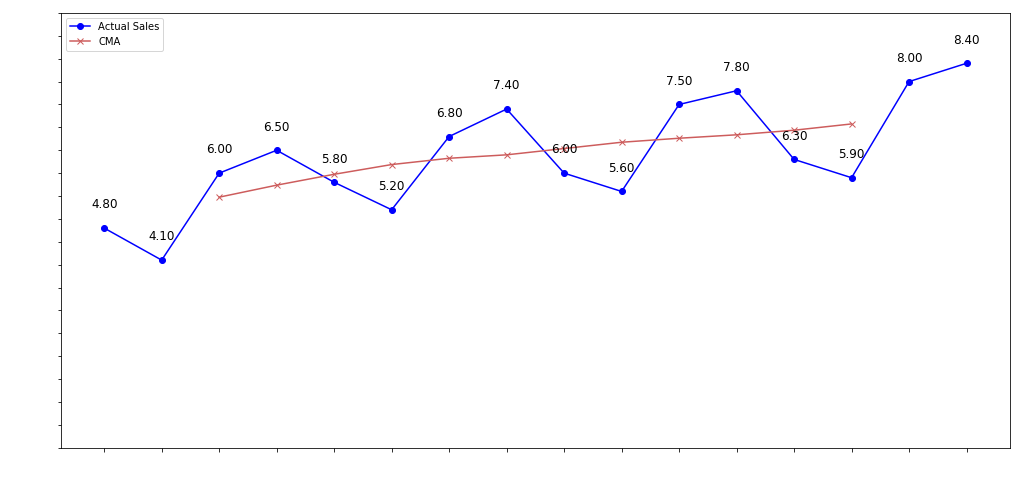

In [257]:
plt.clf()

fig = plt.figure(figsize = (17,8))
ax1 = fig.add_subplot(111)

#Datapoints
xs = np.arange(1,17,1)
ys = sales

y2 = df_sales['CMA-2']




plt.plot(xs,ys ,linestyle = '-', marker = 'o', color = 'blue',label = 'Actual Sales')
plt.plot(xs,y2 ,linestyle = '-', marker = 'x', color = 'indianred', label = 'CMA')
plt.legend(loc = 'upper left')


# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20), # distance from text to points (x,y)
                 ha='center', fontsize = 12) # horizontal alignment can be left, right or center

plt.xticks(np.arange(1,17,1) , fontsize = 15, color = 'White' )
plt.yticks(np.arange(0,10,0.5), fontsize = 15, color = 'White')

plt.ylabel("Sales", fontsize = 20, color = 'White')
plt.xlabel("Quarters", fontsize = 20, color = 'White')






In [102]:
df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2
0,Year 1,1,4.8,NaN,NaN,NaN,NaN
1,Year 1,2,4.1,NaN,NaN,NaN,NaN
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750


In [103]:
df_sales['St,It'] = df_sales['Sales']/df_sales['CMA-2']

In [104]:
df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2,"St,It"
0,Year 1,1,4.8,NaN,NaN,NaN,NaN,NaN
1,Year 1,2,4.1,NaN,NaN,NaN,NaN,NaN
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750,1.095890
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375,1.132898
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750,0.970711
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875,0.840404
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250,1.075099
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000,1.156250
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375,0.917782
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750,0.838951


array([0., 0., 0., 0.])

In [133]:
df_sales['Sales'][3::4]
    

3     6.5
7     7.4
11    7.8
15    8.4
Name: Sales, dtype: float64

In [186]:
quarter1_mean = np.mean(df_sales['St,It'][0::4])
quarter2_mean = np.mean(df_sales['St,It'][1::4])
quarter3_mean = np.mean(df_sales['St,It'][2::4])
quarter4_mean = np.mean(df_sales['St,It'][3::4])

In [188]:
quarter_mean_srs = Series(data = [quarter1_mean,quarter2_mean,quarter3_mean,quarter4_mean])
quarter_mean_srs

0    0.932200
1    0.837759
2    1.093349
3    1.143305
dtype: float64

Text(0.5, 1.0, 'Quarter Performance')

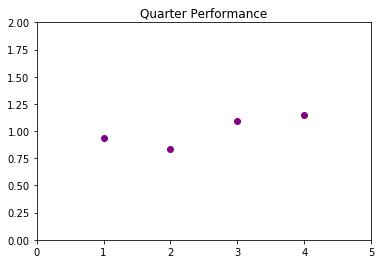

In [191]:
#performance during quarters
x3 = np.arange(1,5)
y3 = quarter_mean_srs
plt.scatter( y = y3, x = x3, color = 'purple')

#Limits of the axis
plt.xlim(0,5)
plt.ylim(0,2)

plt.title('Quarter Performance')

In [192]:
St = pd.concat([y3,y3,y3,y3],axis = 0,ignore_index = True)
df_sales['S_t'] = St

In [197]:

df_sales.drop('Deseasonalize',axis =1, inplace = True)

df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2,"St,It",S_t
0,Year 1,1,4.8,NaN,NaN,NaN,NaN,NaN,0.932200
1,Year 1,2,4.1,NaN,NaN,NaN,NaN,NaN,0.837759
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750,1.095890,1.093349
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375,1.132898,1.143305
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750,0.970711,0.932200
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875,0.840404,0.837759
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250,1.075099,1.093349
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000,1.156250,1.143305
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375,0.917782,0.932200
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750,0.838951,0.837759


In [198]:
df_sales['Deseasonalize'] = df_sales['Sales']/df_sales['S_t']
df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2,"St,It",S_t,Deseasonalize
0,Year 1,1,4.8,NaN,NaN,NaN,NaN,NaN,0.932200,5.149107
1,Year 1,2,4.1,NaN,NaN,NaN,NaN,NaN,0.837759,4.894008
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750,1.095890,1.093349,5.487727
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375,1.132898,1.143305,5.685271
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750,0.970711,0.932200,6.221838
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875,0.840404,0.837759,6.207034
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250,1.075099,1.093349,6.219424
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000,1.156250,1.143305,6.472463
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375,0.917782,0.932200,6.436384
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750,0.838951,0.837759,6.684498


In [202]:
from sklearn.linear_model import LinearRegression

x4 = np.arange(16)
y4 = df_sales['Deseasonalize'] 
new_model = LinearRegression().fit(x4.reshape(-1,1), y4)
intercept =  new_model.intercept_
slope =  new_model.coef_

In [203]:
intercept

5.24674881076868

In [205]:
slope

array([0.14713872])

In [173]:
# Our equation is y = 5.2467 + 0.1471 * t 
np.arange(1,17)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [182]:
quarter3_mean = np.mean(df_sales['St,It'][2::4])
quarter3_mean

1.0933488421606843

In [206]:
df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2,"St,It",S_t,Deseasonalize
0,Year 1,1,4.8,NaN,NaN,NaN,NaN,NaN,0.932200,5.149107
1,Year 1,2,4.1,NaN,NaN,NaN,NaN,NaN,0.837759,4.894008
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750,1.095890,1.093349,5.487727
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375,1.132898,1.143305,5.685271
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750,0.970711,0.932200,6.221838
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875,0.840404,0.837759,6.207034
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250,1.075099,1.093349,6.219424
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000,1.156250,1.143305,6.472463
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375,0.917782,0.932200,6.436384
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750,0.838951,0.837759,6.684498


In [185]:
np.mean(df_sales['St,It'][0::4])

0.93220047731596

In [209]:
T = np.zeros(16)
for n in np.arange(16):
    T[n] = intercept + slope * n

T

array([5.24674881, 5.39388753, 5.54102624, 5.68816496, 5.83530367,
       5.98244239, 6.12958111, 6.27671982, 6.42385854, 6.57099725,
       6.71813597, 6.86527469, 7.0124134 , 7.15955212, 7.30669083,
       7.45382955])

In [211]:
df_sales['T'] = T
df_sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2,"St,It",S_t,Deseasonalize,T
0,Year 1,1,4.8,NaN,NaN,NaN,NaN,NaN,0.932200,5.149107,5.246749
1,Year 1,2,4.1,NaN,NaN,NaN,NaN,NaN,0.837759,4.894008,5.393888
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750,1.095890,1.093349,5.487727,5.541026
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375,1.132898,1.143305,5.685271,5.688165
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750,0.970711,0.932200,6.221838,5.835304
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875,0.840404,0.837759,6.207034,5.982442
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250,1.075099,1.093349,6.219424,6.129581
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000,1.156250,1.143305,6.472463,6.276720
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375,0.917782,0.932200,6.436384,6.423859
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750,0.838951,0.837759,6.684498,6.570997


In [218]:
df_sales['Forecast'] = df_sales['S_t'] * df_sales['T']
df_sales

# Trend multiplied by seasonal component gives the Forecast. 
#Deseasonalized column gives the performance if we remove seasonal boost in sales

,Year,Quarter,Sales,MA for 4 quarters,CMA,MA for 4 Quarters,CMA-2,"St,It",S_t,Deseasonalize,T,Forecast
0,Year 1,1,4.8,NaN,NaN,NaN,NaN,NaN,0.932200,5.149107,5.246749,4.891022
1,Year 1,2,4.1,NaN,NaN,NaN,NaN,NaN,0.837759,4.894008,5.393888,4.518779
2,Year 1,3,6.0,NaN,NaN,5.350,5.4750,1.095890,1.093349,5.487727,5.541026,6.058275
3,Year 1,4,6.5,5.350,NaN,5.600,5.7375,1.132898,1.143305,5.685271,5.688165,6.503308
4,Year 2,1,5.8,5.600,5.4750,5.875,5.9750,0.970711,0.932200,6.221838,5.835304,5.439673
5,Year 2,2,5.2,5.875,5.7375,6.075,6.1875,0.840404,0.837759,6.207034,5.982442,5.011846
6,Year 2,3,6.8,6.075,5.9750,6.300,6.3250,1.075099,1.093349,6.219424,6.129581,6.701770
7,Year 2,4,7.4,6.300,6.1875,6.350,6.4000,1.156250,1.143305,6.472463,6.276720,7.176206
8,Year 3,1,6.0,6.350,6.3250,6.450,6.5375,0.917782,0.932200,6.436384,6.423859,5.988324
9,Year 3,2,5.6,6.450,6.4000,6.625,6.6750,0.838951,0.837759,6.684498,6.570997,5.504913


In [217]:
twenty =  np.arange(20)
St_20 = St = pd.concat([y3,y3,y3,y3,y3],axis = 0,ignore_index = True)
T2 = np.zeros(20)
for n in np.arange(20):
    T2[n] = intercept + slope * n



In [234]:
St_20_S = Series(data = St_20)
data = {'S': St_20_S}
forecast_df = DataFrame(data, index = twenty)
forecast_df

,S
0,0.932200
1,0.837759
2,1.093349
3,1.143305
4,0.932200
5,0.837759
6,1.093349
7,1.143305
8,0.932200
9,0.837759


In [235]:
forecast_df['Trend'] = T2

In [237]:
forecast_df['Forecast'] = forecast_df['S'] * forecast_df['Trend']
forecast_df

,S,Trend,Forecast
0,0.932200,5.246749,4.891022
1,0.837759,5.393888,4.518779
2,1.093349,5.541026,6.058275
3,1.143305,5.688165,6.503308
4,0.932200,5.835304,5.439673
5,0.837759,5.982442,5.011846
6,1.093349,6.129581,6.701770
7,1.143305,6.276720,7.176206
8,0.932200,6.423859,5.988324
9,0.837759,6.570997,5.504913


Text(0.5, 1.0, 'Forecast vs Actual')

<Figure size 432x288 with 0 Axes>

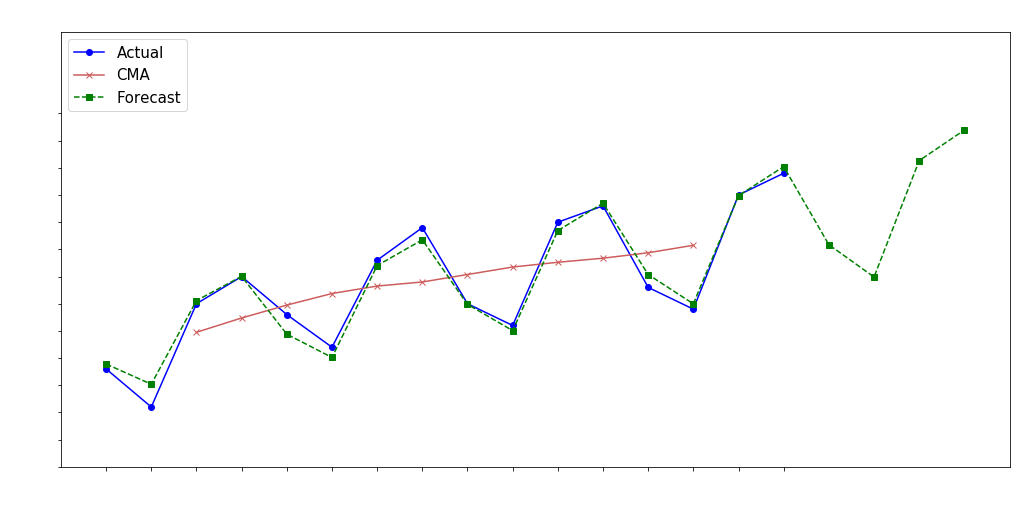

In [263]:
plt.clf()

fig = plt.figure(figsize = (17,8))
ax1 = fig.add_subplot(111)

#Datapoints
xs = np.arange(1,17,1)
ys = sales
x_20 = np.arange(1,21,1)

y2 = df_sales['CMA-2']

y_forecast = forecast_df['Forecast']



plt.plot(xs,ys ,linestyle = '-', marker = 'o', color = 'blue', label = 'Actual')
plt.plot(xs,y2 ,linestyle = '-', marker = 'x', color = 'indianred', label = 'CMA')
plt.plot(x_20,y_forecast ,linestyle = '--', marker = 's', color = 'green', label = 'Forecast')

plt.legend(loc = 'upper left',fontsize = 15)


plt.xticks(np.arange(1,17,1) , fontsize = 15, color = 'White' )
plt.yticks(np.arange(0,10,0.5), fontsize = 15, color = 'White')

plt.ylabel("Sales", fontsize = 20, color = 'White')
plt.xlabel("Quarters", fontsize = 20, color = 'White')

plt.xlim(0,21)
plt.ylim(3,11)

plt.title('Forecast vs Actual', color = 'white', fontsize = 25)


In [249]:
#Following is the forecast for the next 4 quarters:
T2[16:20]

array([7.60096826, 7.74810698, 7.8952457 , 8.04238441])

In [ ]:
#Steps:
# Calculate Moving Average - MA(4), Centered Moving Average -  CMA(2)
# Calculate Seasonal, Irregular components - St,It = Yt/CMA(2)
# Calculate St
#Deseasonalize by Yt/St
# Find Trend using Linear Regression
# Forecast = St * T